**1. Importing Data to Python**

In [1]:
# Import library for data structuring
import pandas as pd

# Import library for number calculation
import numpy as np

In [2]:
def importData(filename):
    """
    Function to import data and remove duplicates 
    :param filename: <string> input file name (.csv format) 
    :return df: <pandas dataframe> sample data
    """

    # read data
    df = pd.read_csv(filename, index_col =0)
    print("Original Data   : ", df.shape, "- (#observartion, #column)")

    # drop duplicates
    df = df.drop_duplicates()
    print("Data after-drop : ", df.shape, "- (#observartion, #column)")

    return df

In [3]:
# input
file = "Sample - Pharmacy.csv"

# panggil fungsi
pharmacy_df = importData(filename = file)

Original Data   :  (9994, 19) - (#observartion, #column)
Data after-drop :  (9993, 19) - (#observartion, #column)


In [4]:
pharmacy_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Pharmacy-1,Pharmacy,Indonesia,Nusa Barat-14,Nusa Barat,Bali Nusa,BO-10001798,Respi,Respi/A,Respi/ABO-10001798,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Pharmacy-1,Pharmacy,Indonesia,Nusa Barat-14,Nusa Barat,Bali Nusa,CH-10000454,Respi,Respi/B,Respi/BCH-10000454,731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Hospital-1,Hospital,Indonesia,Jawa Barat-144,Jawa Barat,Jawa,LA-10000240,Hyper,Hyper/F,Hyper/FLA-10000240,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Pharmacy-2,Pharmacy,Indonesia,Banten-38,Banten,Jawa,TA-10000577,Respi,Respi/D,Respi/DTA-10000577,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Pharmacy-2,Pharmacy,Indonesia,Banten-38,Banten,Jawa,ST-10000760,Hyper,Hyper/H,Hyper/HST-10000760,22.3680,2,0.20,2.5164


**2. Data Exploratory**

In [5]:
# Import library for data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
pharmacy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9993 non-null   object 
 2   Ship Date      9993 non-null   object 
 3   Ship Mode      9993 non-null   object 
 4   Customer ID    9993 non-null   object 
 5   Customer Name  9993 non-null   object 
 6   Segment        9993 non-null   object 
 7   Country        9993 non-null   object 
 8   City           9993 non-null   object 
 9   State          9993 non-null   object 
 10  Region         9993 non-null   object 
 11  Product ID     9993 non-null   object 
 12  Category       9993 non-null   object 
 13  Sub-Category   9993 non-null   object 
 14  Product Name   9993 non-null   object 
 15  Sales          9993 non-null   float64
 16  Quantity       9993 non-null   int64  
 17  Discount       9993 non-null   float64
 18  Profit  

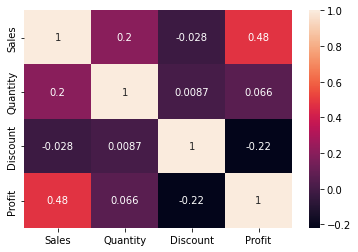

In [7]:
sns.heatmap(pharmacy_df.corr(), annot =True)

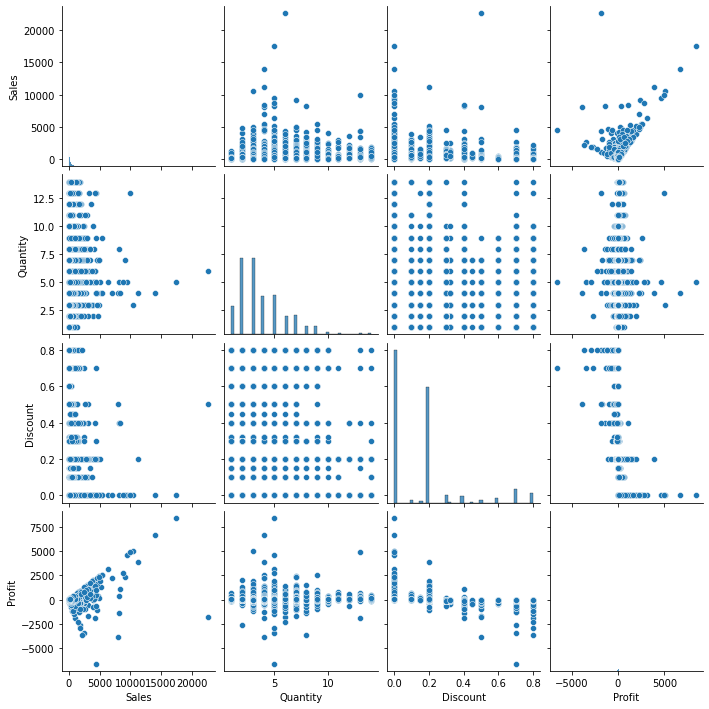

In [8]:
sns.pairplot(pharmacy_df)

Insight from Numerical Data:
- Profit is our target column for this case
- Profit has high correlation with sales data
- Second highest correlation with discount data
- And very small correlation with quantity

In [9]:
print("Mean Profit:", round(pharmacy_df['Profit'].mean()))

print("Median Profit:", round(pharmacy_df['Profit'].median()))

print("Highest Profit:", round(pharmacy_df['Profit'].max()))

print("Lowest Profit:", round(pharmacy_df['Profit'].min()))

Mean Profit: 29
Median Profit: 9
Highest Profit: 8400
Lowest Profit: -6600


Text(0.5, 1.0, 'Category vs Profit')

<Figure size 432x288 with 0 Axes>

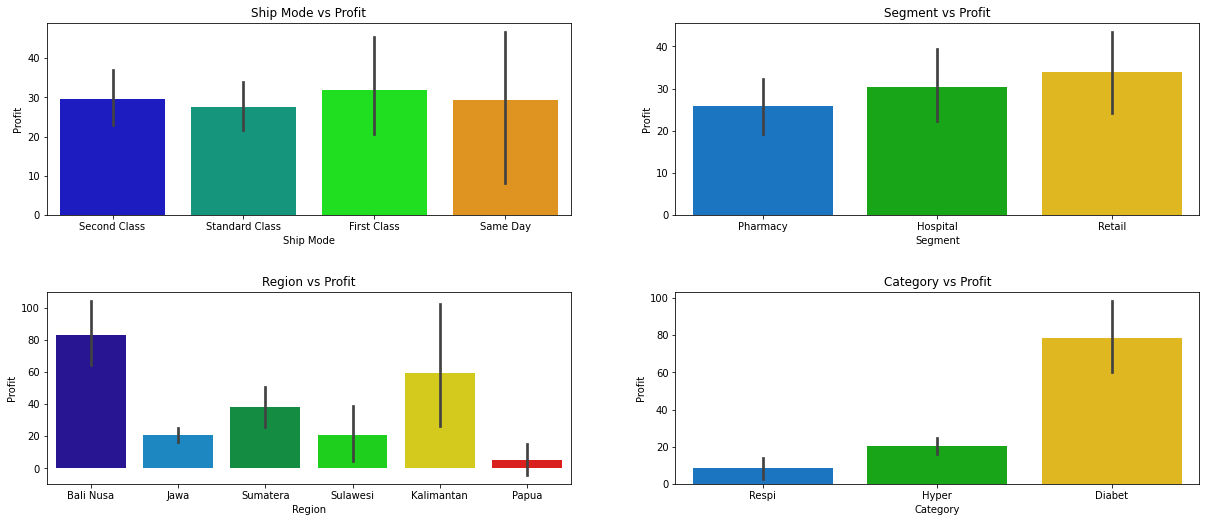

In [10]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = pharmacy_df['Ship Mode'], y = pharmacy_df['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = pharmacy_df['Segment'], y = pharmacy_df['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = pharmacy_df['Region'], y = pharmacy_df['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = pharmacy_df['Category'], y = pharmacy_df['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

Insight from Sample Categorical Data:
- First Class shipping mode has marginly high profit than other shipping modes.
- Customers of Retail types generate more profit.
- Profit is more in Bali Nusa region.
- Diabet product category has high profit.

**3. Data Preprocessing**

a. Input-Output Split

In [11]:
def extractInputOutput(data,
                       output_column_name):
    """
    Function to separate input and output data
     :param data: <pandas dataframe> data of all samples
     :param output_column_name: <string> output column name
     :return input_data: <pandas dataframe> input data
     :return output_data: <pandas series> output data
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [12]:
X, y = extractInputOutput(data = pharmacy_df,
                          output_column_name = "Profit")

In [13]:
X.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Pharmacy-1,Pharmacy,Indonesia,Nusa Barat-14,Nusa Barat,Bali Nusa,BO-10001798,Respi,Respi/A,Respi/ABO-10001798,261.96,2,0.0
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Pharmacy-1,Pharmacy,Indonesia,Nusa Barat-14,Nusa Barat,Bali Nusa,CH-10000454,Respi,Respi/B,Respi/BCH-10000454,731.94,3,0.0


In [14]:
y.head(2)

Row ID
1     41.9136
2    219.5820
Name: Profit, dtype: float64

b. Split train & test

In [15]:
# Import train-test splitting library from sklearn (scikit learn)
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_test.shape[0] / X.shape[0])

(6995, 18)
(2998, 18)
0.30001000700490343


c. Splitting Categorical & Numerical Column

In [18]:
categorical_col = (X_train.select_dtypes('O')).columns
numerical_col = list(set(X_train.columns) - set(categorical_col))

categorical_col, numerical_col

(Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
        'Product ID', 'Category', 'Sub-Category', 'Product Name'],
       dtype='object'), ['Quantity', 'Sales', 'Discount'])

In [19]:
def splitNumCat(data, num_col, cat_col):
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat
    

In [20]:
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numerical_col,
                                       cat_col = categorical_col)

In [21]:
X_train_num.head()

,Quantity,Sales,Discount
Row ID,,,
3490,6,382.116,0.3
7377,4,54.336,0.2
6180,2,63.960,0.0
1726,2,3.552,0.2
6730,3,6.129,0.7


In [22]:
X_train_cat.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,
3490,CA-2015-157322,7/2/2015,7/6/2015,Standard Class,RH-19600,Pharmacy-309,Pharmacy,Indonesia,Sulawesi Selatan-471,Sulawesi Selatan,Sulawesi,CH-10003774,Respi,Respi/B,Respi/BCH-10003774
7377,US-2017-145597,11/2/2017,11/5/2017,First Class,GG-14650,Hospital-16,Hospital,Indonesia,Sulawesi Selatan-473,Sulawesi Selatan,Sulawesi,AR-10001958,Hyper,Hyper/B,Hyper/BAR-10001958
6180,CA-2015-158421,9/21/2015,9/26/2015,Standard Class,GB-14575,Pharmacy-356,Pharmacy,Indonesia,Daerah Yogyakarta-71,DKI Jakarta,Jawa,ST-10000563,Hyper,Hyper/H,Hyper/HST-10000563
1726,CA-2015-127453,12/19/2015,12/20/2015,First Class,JK-15370,Pharmacy-151,Pharmacy,Indonesia,DKI Jakarta-84,DKI Jakarta,Jawa,AP-10002906,Hyper,Hyper/A,Hyper/AAP-10002906
6730,CA-2015-156734,6/18/2015,6/20/2015,First Class,BV-11245,Hospital-90,Hospital,Indonesia,Nusa Timur-26,Daerah Yogyakarta,Jawa,BI-10002982,Hyper,Hyper/C,Hyper/CBI-10002982


d. Handling and Imputer Data

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
def imputerNum(data, imputer = None):
    if imputer == None:
        # Create imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data with imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer


In [25]:
def imputerCat(data, imputer = None):
    if imputer == None:
        # Create imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant",
                                fill_value = "UNKNOWN")
        imputer.fit(data)

    # Transform data with imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer


In [26]:
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

In [27]:
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

e. Preprocessing Categorical Variables

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
def label_encoder(data, encoder_cols):
    """
    Applies LabelEncoder to specified columns of a DataFrame
    Input:
        data: DataFrame
        encoder_cols: list of column names to apply LabelEncoder
    Output:
        DataFrame with encoded columns
    """
    for col in encoder_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

In [30]:
X_train_cat_encoded = label_encoder(X_train_cat_imputed, categorical_col)

In [31]:
X_train_cat_encoded.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,
3490,1276,927,1039,3,644,469,1,0,428,27,4,708,2,14,1554
7377,3990,229,297,0,296,67,0,0,430,27,4,301,1,5,551
6180,1283,1133,1235,3,294,521,1,0,130,5,1,1606,1,11,1294
1726,937,337,361,0,376,294,1,0,113,5,1,201,1,4,451
6730,1270,824,883,0,116,226,0,0,385,6,1,517,1,6,767


In [32]:
X_train_concat = pd.concat([X_train_num_imputed, X_train_cat_encoded],
                           axis = 1)
X_train_concat.head()

,Quantity,Sales,Discount,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,,,,
3490,6.0,382.116,0.3,1276,927,1039,3,644,469,1,0,428,27,4,708,2,14,1554
7377,4.0,54.336,0.2,3990,229,297,0,296,67,0,0,430,27,4,301,1,5,551
6180,2.0,63.960,0.0,1283,1133,1235,3,294,521,1,0,130,5,1,1606,1,11,1294
1726,2.0,3.552,0.2,937,337,361,0,376,294,1,0,113,5,1,201,1,4,451
6730,3.0,6.129,0.7,1270,824,883,0,116,226,0,0,385,6,1,517,1,6,767


f. Standardizing Variables

In [33]:
from sklearn.preprocessing import StandardScaler

def standardizerData(data):
    """
    Function to standardize data
     :param data: <pandas dataframe> sample data
     :return standardized_data: <pandas dataframe> standardized data sample
     :return standardizer: method for standardizing data
    """
    data_columns = data.columns  
    data_index = data.index  

    # Create (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [34]:
X_train_clean, standardizer = standardizerData(data = X_train_concat)

In [35]:
X_train_clean.head()

,Quantity,Sales,Discount,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,,,,
3490,0.980422,0.218243,0.685522,-0.639430,0.904959,1.059075,0.696065,1.069306,0.338101,0.171071,0.0,1.300645,1.380751,1.019592,-0.350642,1.540358,1.275184,1.204780
7377,0.092878,-0.270286,0.204074,1.648199,-1.055127,-0.878420,-2.032162,-0.462414,-1.416186,-1.286473,0.0,1.315718,1.380751,1.019592,-1.126281,-0.043706,-0.674760,-0.745886
6180,-0.794666,-0.255942,-0.758824,-0.633530,1.483436,1.570867,0.696065,-0.471217,0.565024,0.171071,0.0,-0.945212,-1.004081,-0.705347,1.360718,-0.043706,0.625202,0.699124
1726,-0.794666,-0.345975,0.204074,-0.925173,-0.751847,-0.711304,-2.032162,-0.110294,-0.425581,0.171071,0.0,-1.073332,-1.004081,-0.705347,-1.316856,-0.043706,-0.891421,-0.940369
6730,-0.350894,-0.342134,2.611317,-0.644488,0.615720,0.651731,-2.032162,-1.254683,-0.722326,-1.286473,0.0,0.976579,-0.895680,-0.705347,-0.714640,-0.043706,-0.458100,-0.325802


**4. Training Machine Learning**

a. Baseline Model

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
y_pred_baseline = y_train.mean()
y_pred_baseline

30.352213995711224

In [38]:
mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

print(f"MAE Train :{mae_train_baseline:.4f}")
print(f"MAE CV    :{mae_train_baseline:.4f}")
print(f"MAE Test  :{mae_test_baseline:.4f}")

MAE Train :67.7164
MAE CV    :67.7164
MAE Test  :56.4897


b. Decision Tree Regression Model

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
params = {"max_depth": [2, 4, 6, 8, 10]}

# Create gridsearch
tree = DecisionTreeRegressor(random_state = 123)

tree_cv = GridSearchCV(estimator = tree,
                       param_grid = params,
                       cv = 10,
                       scoring = "neg_mean_absolute_error")

In [41]:
# Fit grid search cv
tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [2, 4, 6, 8, 10]},
             scoring='neg_mean_absolute_error')

In [42]:
# Best params
tree_cv.best_params_

{'max_depth': 10}

In [43]:
means_dt = tree_cv.cv_results_['mean_test_score']*-1
params_dt = tree_cv.cv_results_['params']

for mean, param in zip(means_dt, params_dt):
    print("Mean: %f, Param: %r" % (mean, param))

Mean: 61.845875, Param: {'max_depth': 2}
Mean: 54.376783, Param: {'max_depth': 4}
Mean: 40.712483, Param: {'max_depth': 6}
Mean: 32.869378, Param: {'max_depth': 8}
Mean: 30.895703, Param: {'max_depth': 10}


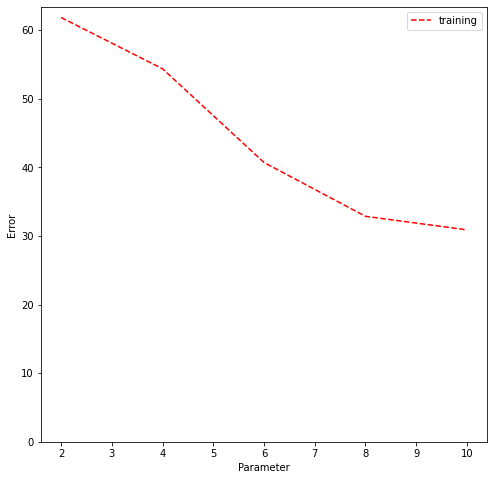

In [44]:
params_dt = np.array(list(params.values()))[0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(params_dt, means_dt, "--r", label="training")
ax.set_ylim(0)
ax.set_xlabel("Parameter")
ax.set_ylabel("Error")
plt.legend()
plt.show()

In [45]:
# Refit the bagging tree
tree = DecisionTreeRegressor(max_depth = tree_cv.best_params_["max_depth"],
                             random_state = 123)

tree.fit(X_train_clean, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [46]:
# Predict
y_pred_train_dt = tree.predict(X_train_clean)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_cv_dt = -tree_cv.best_score_

print(f"MAE Train :{mae_train_dt:.4f}")
print(f"MAE CV    :{mae_cv_dt:.4f}")

MAE Train :12.0014
MAE CV    :30.8957


In [47]:
summary_train_pred_dt = pd.DataFrame({"actual": y_train,
                                   "prediction": y_pred_train_dt})

summary_train_pred_dt.head()

,actual,prediction
Row ID,,
3490,-92.7996,-43.784934
7377,5.4336,11.192035
6180,6.3960,12.202897
1726,0.4440,1.008632
6730,-4.4946,-5.862503


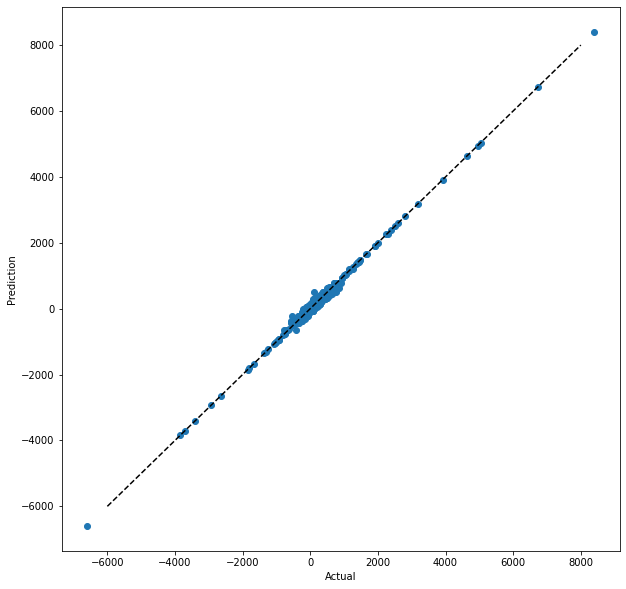

In [48]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred_dt["actual"], summary_train_pred_dt["prediction"])
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)
plt.show()

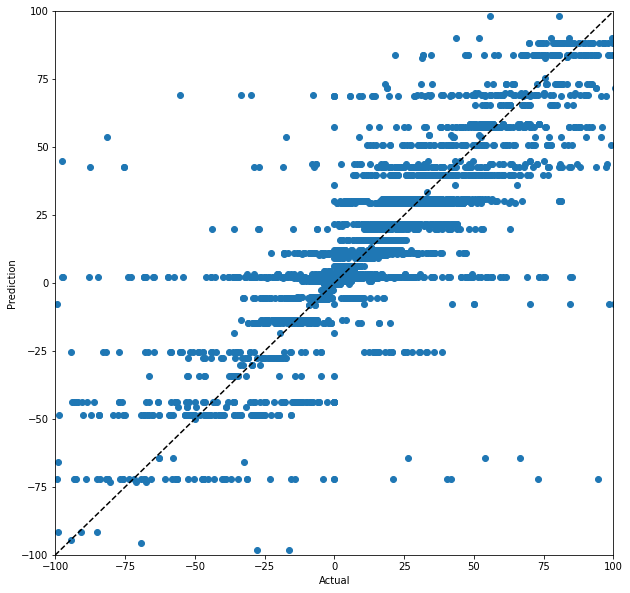

In [49]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred_dt["actual"], summary_train_pred_dt["prediction"])
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.show()

c. Random Forest Method

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

In [52]:
# Fit random forest
rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [53]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)

mae_train

12.208654719228019

In [54]:
B = [5, 10, 15, 20, 30, 50, 100, 500]

In [55]:
params = {"n_estimators": B,
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 10,
                          scoring = "neg_mean_absolute_error")

In [56]:
# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 100, 500]},
             scoring='neg_mean_absolute_error')

In [57]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [58]:
means_rf = rf_tree_cv.cv_results_['mean_test_score']*-1
params_rf = rf_tree_cv.cv_results_['params']

for mean, param in zip(means_rf, params_rf):
    print("Mean: %f, Param: %r" % (mean, param))

Mean: 38.955542, Param: {'max_features': 'sqrt', 'n_estimators': 5}
Mean: 36.932157, Param: {'max_features': 'sqrt', 'n_estimators': 10}
Mean: 34.962411, Param: {'max_features': 'sqrt', 'n_estimators': 15}
Mean: 33.833138, Param: {'max_features': 'sqrt', 'n_estimators': 20}
Mean: 34.013208, Param: {'max_features': 'sqrt', 'n_estimators': 30}
Mean: 34.112297, Param: {'max_features': 'sqrt', 'n_estimators': 50}
Mean: 32.913128, Param: {'max_features': 'sqrt', 'n_estimators': 100}
Mean: 32.408563, Param: {'max_features': 'sqrt', 'n_estimators': 500}
Mean: 38.955542, Param: {'max_features': 'log2', 'n_estimators': 5}
Mean: 36.932157, Param: {'max_features': 'log2', 'n_estimators': 10}
Mean: 34.962411, Param: {'max_features': 'log2', 'n_estimators': 15}
Mean: 33.833138, Param: {'max_features': 'log2', 'n_estimators': 20}
Mean: 34.013208, Param: {'max_features': 'log2', 'n_estimators': 30}
Mean: 34.112297, Param: {'max_features': 'log2', 'n_estimators': 50}
Mean: 32.913128, Param: {'max_feat

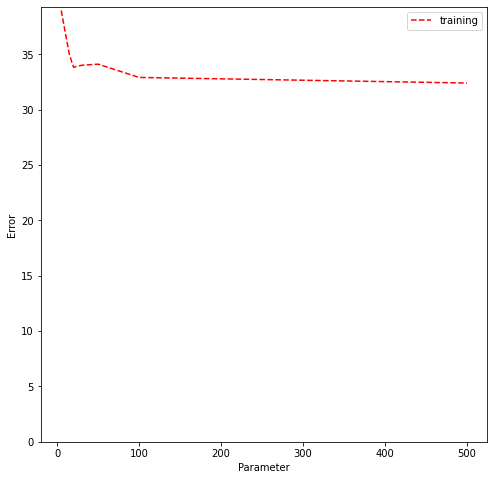

In [59]:
means_rf_sqrt = means_rf[0:len(B)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(B, means_rf_sqrt, "--r", label="training")
ax.set_ylim(0)
ax.set_xlabel("Parameter")
ax.set_ylabel("Error")
plt.legend()
plt.show()

In [60]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=123)

In [61]:
# Predict
y_pred_train_rf = rf_tree.predict(X_train_clean)

# MSE
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_cv_rf = -rf_tree_cv.best_score_

print(f"MAE Train :{mae_train_rf:.4f}")
print(f"MAE CV    :{mae_cv_rf:.4f}")

MAE Train :11.7743
MAE CV    :32.4086


In [62]:
summary_train_pred_rf = pd.DataFrame({"actual": y_train,
                                   "prediction": y_pred_train_rf})

summary_train_pred_rf.head()

,actual,prediction
Row ID,,
3490,-92.7996,-80.649986
7377,5.4336,1.570850
6180,6.3960,8.936248
1726,0.4440,2.990488
6730,-4.4946,-6.066388


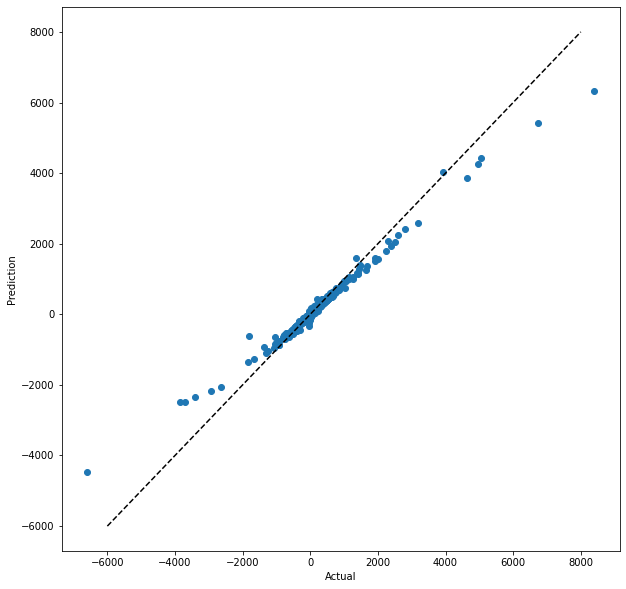

In [63]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred_rf["actual"], summary_train_pred_rf["prediction"])
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)
plt.show()

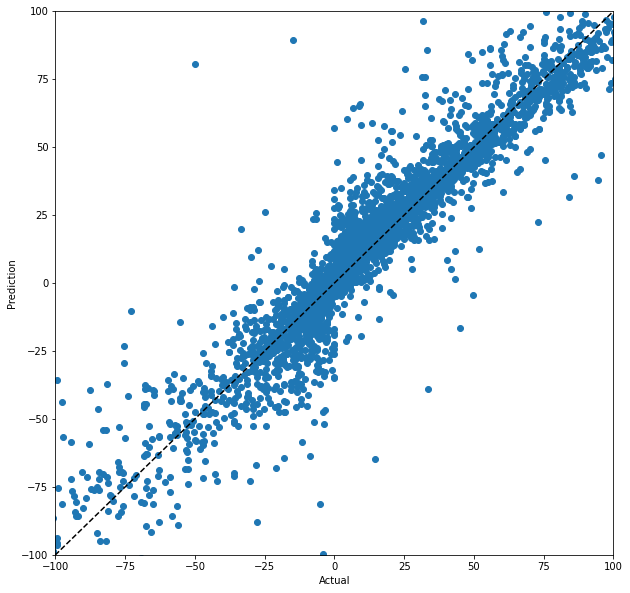

In [64]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred_rf["actual"], summary_train_pred_rf["prediction"])
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.show()

d. Comparison

In [65]:
mae_train = [mae_train_baseline, mae_train_dt, mae_train_rf]
mae_cv = [mae_train_baseline, mae_cv_dt, mae_cv_rf]
mae_train_percentage = [1, (mae_train_dt/mae_train_baseline),(mae_train_rf/mae_train_baseline)]
mae_cv_percentage = [1, (mae_cv_dt/mae_train_baseline),(mae_cv_rf/mae_train_baseline)]
indexes = ["Baseline(mean)","decision tree","random forest"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE CV": mae_cv,
                           "MAE% Train": mae_train_percentage,
                           "MAE% CV": mae_cv_percentage},
                          index = indexes)
summary_df

,MAE Train,MAE CV,MAE% Train,MAE% CV
Baseline(mean),67.716434,67.716434,1.000000,1.000000
decision tree,12.001428,30.895703,0.177231,0.456251
random forest,11.774350,32.408563,0.173877,0.478592


Best Model - Random Forest

e. Predict data Test

In [66]:
def extractTest(data,
                num_col, cat_col):
    """
     Function to extract & clean test data
     :param data: <pandas dataframe> sample test data
     :param num_col: <list> numeric columns
     :param cat_col: <list> categorical columns
#    :param imputer_numerical: <sklearn method> imputer numeric data
     :param standardizer: <sklearn method> standardizer data
     :return cleaned_data: <pandas dataframe> final data
    """
    # Filter data
    data_num = data[num_col]
    data_cat = data[cat_col]

    # Process data imputer
    data_num_imputed, imputer_num = imputerNum(data_num)
    data_cat_imputed, imputer_cat = imputerCat(data_cat)

    # Process data categoric
    data_cat_encoded = label_encoder(data_cat_imputed, cat_col)

    # Join data
    concat_data = pd.concat([data_num_imputed, data_cat_encoded],
                             axis = 1)
    
    # Standardize data
    cleaned_data, standardizer = standardizerData(data = concat_data)

    return cleaned_data


In [67]:
X_test_clean = extractTest(data = X_test,
                           num_col = numerical_col,
                           cat_col = categorical_col)

In [68]:
X_test_clean.head()

,Quantity,Sales,Discount,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,,,,
5121,0.562011,0.033001,-0.751405,-1.292046,0.169074,0.203562,0.692353,0.093156,-1.214770,-1.280568,0.0,0.341736,0.200070,-0.127813,1.547273,-0.042681,0.631695,0.902498
517,-0.365036,-0.333544,-0.751405,0.580501,-1.572892,-1.540637,0.692353,-1.658201,1.215630,1.694359,0.0,-1.078988,-1.013226,-0.704027,1.559129,-0.042681,0.631695,0.914560
8173,-1.292084,-0.431850,-0.751405,-1.599963,1.067170,0.834442,0.692353,-0.426778,1.317670,1.694359,0.0,-0.703184,-0.572028,-0.704027,0.392499,-0.042681,0.194727,0.154674
1749,-0.828560,-0.416694,0.231690,1.234641,0.104683,0.138618,0.692353,-0.919347,1.781487,1.694359,0.0,-0.162392,-0.461728,-0.704027,0.812201,-0.042681,0.413211,0.526174
5697,2.416105,-0.382230,3.180975,0.561349,-1.413608,-1.370547,0.692353,-1.612593,1.568131,1.694359,0.0,1.322495,1.413366,1.024616,-0.947228,-0.042681,-0.460726,-0.571440


In [69]:
# Predict MAE
y_pred_test = rf_tree.predict(X_test_clean)

mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"MAE Test RF       :{mae_test:.4f}")
print(f"MAE Test Baseline :{mae_test_baseline:.4f}")
print(f"MAE Test %        :{(mae_test/mae_test_baseline):.4f}")

MAE Test RF       :28.5898
MAE Test Baseline :56.4897
MAE Test %        :0.5061


In [70]:
print(f"MAE Test RF       :{mae_test:.4f}")
print(f"MAE CV RF         :{mae_cv_rf:.4f}")
print(f"MAE GAP %         :{1-(mae_test/mae_cv_rf):.4f}")

MAE Test RF       :28.5898
MAE CV RF         :32.4086
MAE GAP %         :0.1178


In [71]:
summary_test_pred_rf = pd.DataFrame({"actual": y_test,
                                   "prediction": y_pred_test})

summary_test_pred_rf.head()

,actual,prediction
Row ID,,
5121,9.3020,37.746864
517,13.8915,9.599259
8173,1.4112,4.321644
1749,3.6288,7.927003
5697,-42.4638,-32.863182


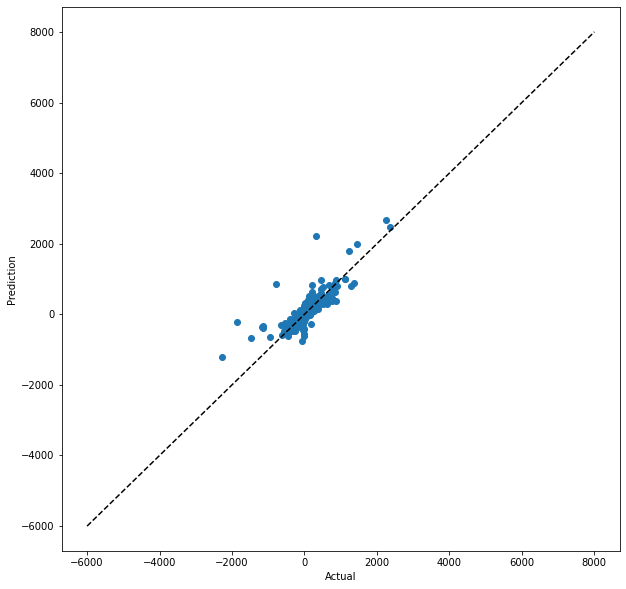

In [72]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)
plt.show()

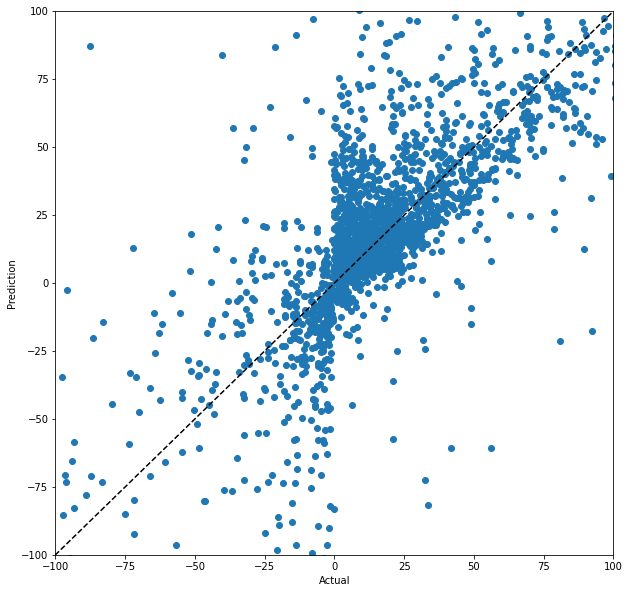

In [73]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.show()

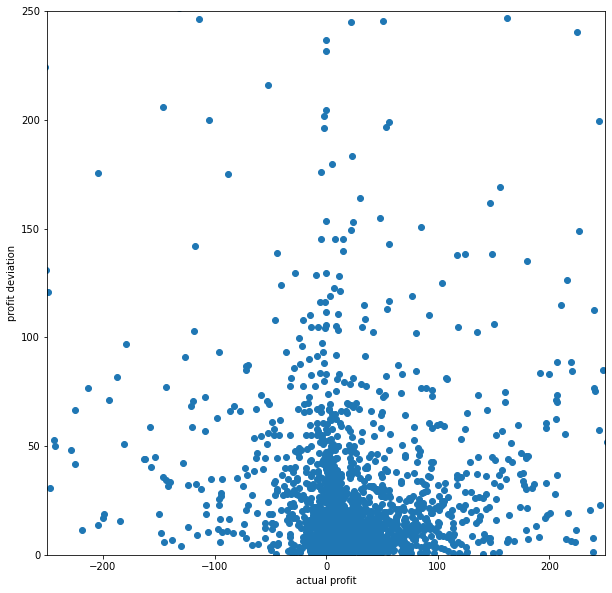

In [74]:
profit_deviation = np.abs(y_test - y_pred_test)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.scatter(y_test, profit_deviation)
plt.xlabel("actual profit")
plt.ylabel("profit deviation")
ax.set_xlim(-250, 250)
ax.set_ylim(0, 250)
plt.show()

Observation

The model performance is good when predicting profit data in the minus 250 - 250 range
On top of that, the performance of the model drops.

Action

EDA data with a high profit/loss.
Decide whether to filter outliers or look for additional data so you can learn data with high profit/loss.

Testing Decision Tree

In [75]:
# Predict MAE
y_pred_test_xxx = tree.predict(X_test_clean)

mae_test_xxx = mean_absolute_error(y_test, y_pred_test_xxx)

print(f"MAE Test DT       :{mae_test_xxx:.4f}")
print(f"MAE Test Baseline :{mae_test_baseline:.4f}")
print(f"MAE Test %        :{(mae_test_xxx/mae_test_baseline):.4f}")

MAE Test DT       :33.6651
MAE Test Baseline :56.4897
MAE Test %        :0.5960


In [76]:
summary_test_pred_dt = pd.DataFrame({"actual": y_test,
                                   "prediction": y_pred_test_xxx})

summary_test_pred_dt.head()

,actual,prediction
Row ID,,
5121,9.3020,30.206272
517,13.8915,3.388130
8173,1.4112,1.008632
1749,3.6288,1.008632
5697,-42.4638,-4.973000


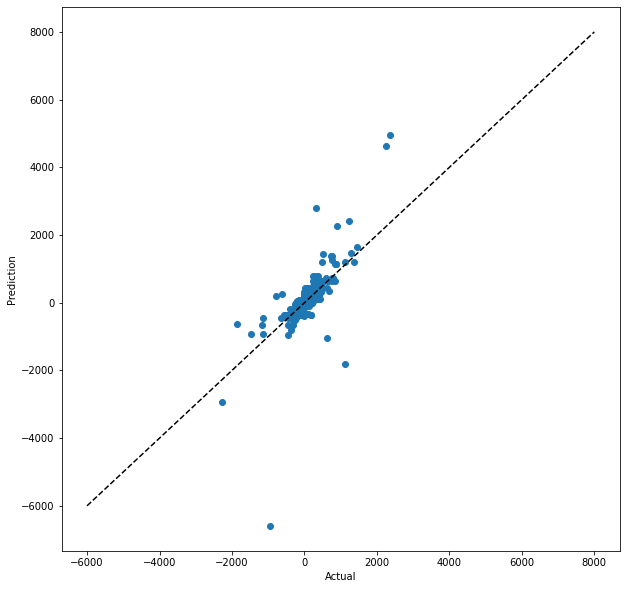

In [77]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test_xxx)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)
plt.show()

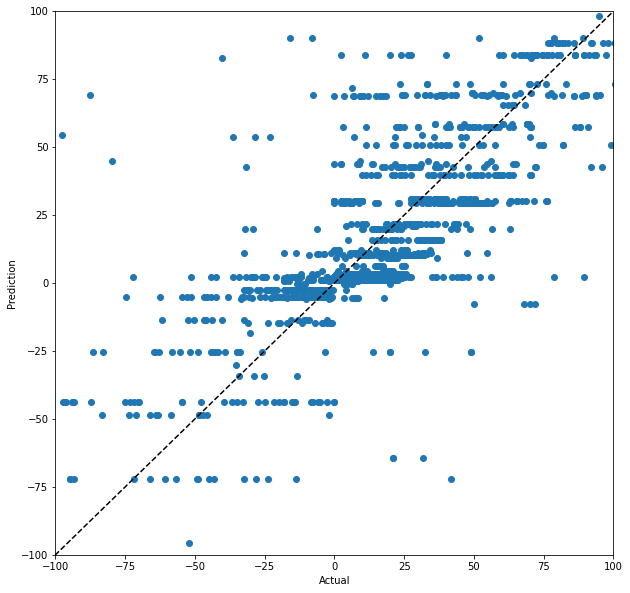

In [78]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test_xxx)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.show()

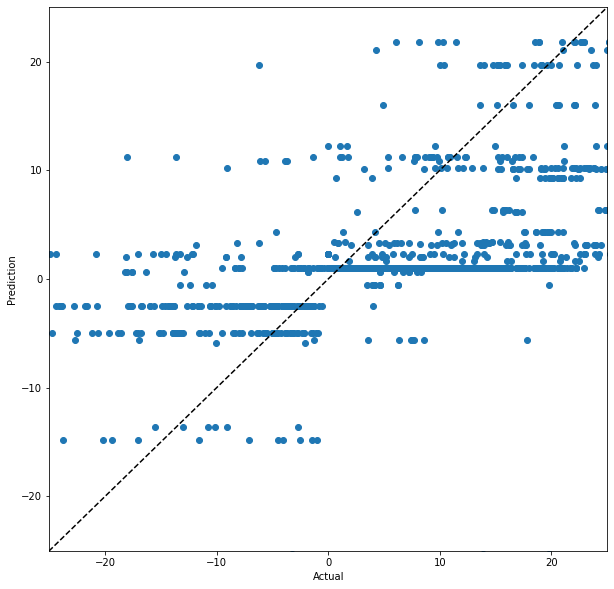

In [79]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test_xxx)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
plt.show()

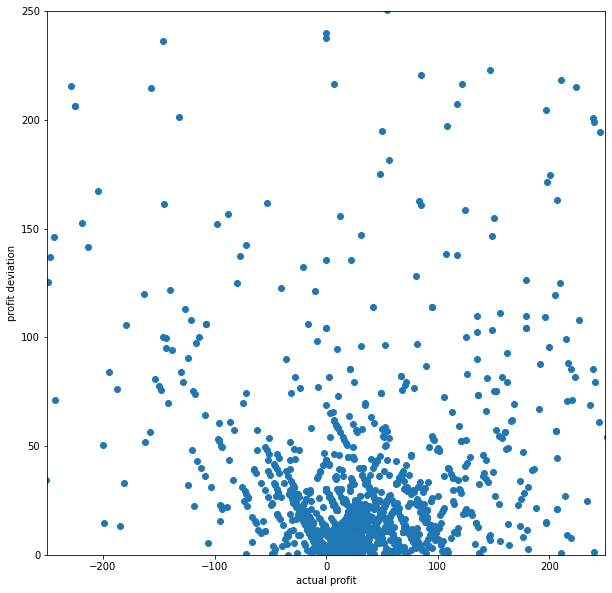

In [80]:
profit_deviation_xxx = np.abs(y_test - y_pred_test_xxx)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.scatter(y_test, profit_deviation_xxx)
plt.xlabel("actual profit")
plt.ylabel("profit deviation")
ax.set_xlim(-250, 250)
ax.set_ylim(0, 250)
plt.show()

Plotting Data baseline

In [81]:
y_pred_test_yyy = y_pred_baseline * np.ones(len(y_test))

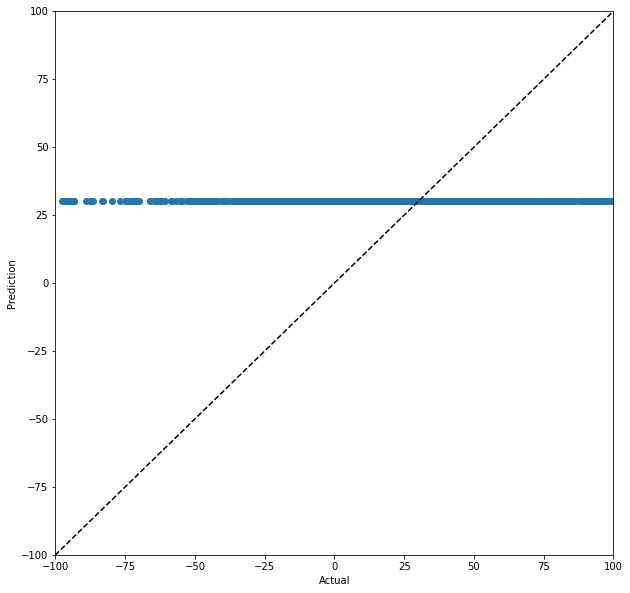

In [82]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_test_yyy)
ax.plot([-6000,8000 ], [-6000, 8000], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.show()